# Improved Random Forest

In [41]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

classifier =  RandomForestClassifier()
# attack = np.array(['BENIGN', 'Bot', 'Brute Force', 'DDoS', 'DoS GoldenEye', 'DoS Hulk', 'DoS Slowhttptest',
#                    'DoS slowloris', 'FTP-Patator', 'PortScan', 'SSH-Patator', 'XSS'])
# attack_groups = np.array(['benign', 'botnet', 'brute_force', 'ddos', 'dos', 'probe', 'web_attack'])
attack = np.array(['BENIGN', 'DoS GoldenEye', 'DoS Hulk', 'DoS Slowhttptest',
                   'DoS slowloris'])
attack_groups = np.array(['benign', 'dos'])

Load features_dataset.csv file

In [22]:
x_train = pd.read_csv('../dataset/x_train.csv')
y_train = pd.read_csv('../dataset/y_train.csv')

x_test = pd.read_csv('../dataset/x_test.csv')
y_test = pd.read_csv('../dataset/y_test.csv')

x_validate = pd.read_csv('../dataset/x_validate.csv')
y_validate = pd.read_csv('../dataset/y_validate.csv')

In [23]:
x_train.head(10)

,Init_Win_bytes_forward,min_seg_size_forward,PSH Flag Count,Down/Up Ratio,Flow IAT Mean,Flow Duration,Fwd IAT Total,Flow IAT Std,Bwd Packet Length Std,Packet Length Std,...,Bwd IAT Total,Bwd IAT Mean,Active Min,Bwd IAT Max,Bwd IAT Std,Fwd IAT Min,FIN Flag Count,Destination Port,Flow IAT Min,Bwd IAT Min
0,0.000015,0.344262,0.0,0.000000,8.266264e-02,8.266263e-01,8.266667e-01,3.702830e-01,0.772133,0.765299,...,8.266667e-01,2.066667e-01,0.000140,8.266667e-01,0.598311,1.666667e-08,1.0,0.001222,1.166667e-07,3.333333e-08
1,0.000015,0.344262,0.0,0.025641,7.000817e-02,8.400979e-01,8.416667e-01,3.431604e-01,0.315785,0.381810,...,8.416667e-01,1.400000e-01,0.000100,8.416667e-01,0.495778,1.666667e-08,1.0,0.001222,1.166667e-07,1.500000e-07
2,0.000000,0.344262,0.0,0.025641,7.027778e-07,2.091667e-06,2.500000e-08,1.630617e-06,0.000000,0.029377,...,3.333333e-08,3.333333e-08,0.000000,3.333333e-08,0.000000,3.333333e-08,0.0,0.000809,1.333333e-07,3.333333e-08
3,0.000000,0.540984,0.0,0.025641,3.018536e-03,9.055592e-03,8.333333e-09,7.398407e-03,0.000000,0.011299,...,3.333333e-08,3.333333e-08,0.000000,3.333333e-08,0.000000,1.666667e-08,0.0,0.000809,1.166667e-07,3.333333e-08
4,0.445572,0.540984,1.0,0.025641,7.221782e-03,2.094315e-01,2.025000e-01,2.870671e-02,0.124671,0.159682,...,2.066667e-01,1.479161e-02,0.002832,8.583333e-02,0.041868,7.583333e-07,0.0,0.001222,1.083333e-07,4.000000e-07
5,0.000015,0.344262,0.0,0.000000,3.333333e-08,3.333333e-08,2.500000e-08,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,3.333333e-08,1.0,0.739154,1.333333e-07,0.000000e+00
6,0.000000,0.344262,0.0,0.025641,3.625000e-06,3.625000e-06,0.000000e+00,0.000000e+00,0.000000,0.008205,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,8.333333e-09,0.0,0.000809,3.725000e-06,0.000000e+00
7,0.003891,0.344262,0.0,0.000000,7.500000e-07,7.500000e-07,7.416667e-07,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,7.500000e-07,0.0,0.001222,8.499999e-07,0.000000e+00
8,0.000000,0.540984,0.0,0.025641,6.833333e-07,2.033333e-06,3.333333e-08,9.021804e-07,0.000000,0.010797,...,6.833333e-07,6.833333e-07,0.000000,6.833333e-07,0.000000,4.166667e-08,0.0,0.000809,1.416667e-07,6.833333e-07
9,0.003845,0.344262,0.0,0.000000,5.879112e-02,7.054934e-01,7.041667e-01,2.877358e-01,0.261301,0.334886,...,1.195775e-03,2.391550e-04,0.000020,1.100867e-03,0.000700,1.666667e-08,0.0,0.001222,1.166667e-07,3.750000e-07


In [24]:
y_train.head(10)    # Label

,Label
0,DoS Hulk
1,DoS Hulk
2,BENIGN
3,BENIGN
4,BENIGN
5,BENIGN
6,BENIGN
7,BENIGN
8,BENIGN
9,DoS Hulk


In [25]:
attack_group = {'BENIGN': 'benign', 
                'DoS Hulk': 'dos',
                'PortScan': 'probe', 
                'DDoS': 'ddos',
                'DoS GoldenEye': 'dos', 
                'FTP-Patator': 'brute_force',
                'SSH-Patator': 'brute_force', 
                'DoS slowloris': 'dos', 
                'DoS Slowhttptest': 'dos',
                'Bot': 'botnet',
                'Brute Force': 'web_attack', 
                'XSS': 'web_attack'}

# Create grouped label column
y_train['Label_Category'] = y_train['Label'].map(lambda x: attack_group[x])
y_train['Label_Category'].value_counts()

Label_Category
benign    263810
dos       151027
Name: count, dtype: int64

same for y_test and y_validate

In [26]:
y_test['Label_Category'] = y_train['Label'].map(lambda x: attack_group[x])
y_validate['Label_Category'] = y_train['Label'].map(lambda x: attack_group[x])

## All labels

In [27]:
#fit
start = time.time()
classifier.fit(x_train, y_train.Label)
end = time.time()
training_time = end - start

In [28]:
# predict
start = time.time()
y_predicted = classifier.predict(x_validate)
end = time.time()
predict_time = end  - start
print(training_time, predict_time)

119.16069746017456 1.3091099262237549


In [29]:
confusion_rf_1 = pd.crosstab(y_validate.Label, y_predicted)
confusion_rf_1

col_0,BENIGN,DoS GoldenEye,DoS Hulk,DoS Slowhttptest,DoS slowloris
Label,,,,,
BENIGN,87899,2,32,2,2
DoS GoldenEye,4,2048,6,0,0
DoS Hulk,18,3,46004,0,0
DoS Slowhttptest,3,0,0,1093,4
DoS slowloris,5,0,0,4,1150


In [30]:
precision, recall, fscore, support = precision_recall_fscore_support(y_validate.Label, y_predicted)
d = {'attack': attack, 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,BENIGN,0.999659,0.999568,0.999613
1,DoS GoldenEye,0.997565,0.995141,0.996351
2,DoS Hulk,0.999175,0.999544,0.999359
3,DoS Slowhttptest,0.994540,0.993636,0.994088
4,DoS slowloris,0.994810,0.992235,0.993521


In [31]:
precision_rf_1, recall_rf_1, fscore_rf_1, n = precision_recall_fscore_support(y_validate.Label, y_predicted, average = 'macro')
accuracy_rf_1 = accuracy_score(y_validate.Label, y_predicted)

## Grouped Labels

In [32]:
# fit
start = time.time()
classifier.fit(x_train, y_train.Label_Category)
end = time.time()
training_time = end - start

In [33]:
# predict
start = time.time()
y_predicted = classifier.predict(x_validate)
end = time.time()
predict_time = end  - start
print(training_time, predict_time)

122.98269438743591 1.1483712196350098


In [34]:
confusion_rf_2 = pd.crosstab(y_validate.Label_Category, y_predicted)
confusion_rf_2

col_0,benign,dos
Label_Category,,
benign,55726,32171
dos,32200,18182


In [35]:
precision, recall, fscore, support = precision_recall_fscore_support(y_validate.Label_Category, y_predicted)
d = {'attack': attack_groups, 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,benign,0.633783,0.633992,0.633887
1,dos,0.361091,0.360883,0.360987


In [36]:
precision_rf_2, recall_rf_2, fscore_rf_2, n = precision_recall_fscore_support(y_validate.Label_Category, y_predicted, average = 'macro')
accuracy_rf_2 = accuracy_score(y_validate.Label_Category, y_predicted)

## Results

In [37]:
print('Random Forrest: Precision / Recall / FScore / Accuracy')
print('All labels:', precision_rf_1, recall_rf_1, fscore_rf_1, accuracy_rf_1)
print('Grouped labels:', precision_rf_2, recall_rf_2, fscore_rf_2, accuracy_rf_2)
# print('Binary labels:', precision_rf_3, recall_rf_3, fscore_rf_3,accuracy_rf_3)

Random Forrest: Precision / Recall / FScore / Accuracy
All labels: 0.9971496403758373 0.9960247121815696 0.9965864994679163 0.9993853007325769
Grouped labels: 0.4974368267539756 0.4974374569374995 0.49743711826457265 0.5344846289024364


## Optimizing

Find the number of estimators value we should use

In [38]:
# n estimators is the number of decision trees we consider in the ensemble 
n_estimators = [12, 25, 50, 100, 200, 400, 800, 1600]
results = []
time_results = []

In [39]:
# note: takes a long time
for estimator in n_estimators: 
    # fit model with n_estimators parameter
    classifier =  RandomForestClassifier(n_estimators=estimator)
    classifier.fit(x_train, y_train.Label_Category)
    
    # predict validation
    start = time.time()
    y_pred = classifier.predict(x_validate)
    end = time.time()
    
    # calculate metrics
    p, r, f1, n = precision_recall_fscore_support(y_validate.Label_Category, y_pred, average = 'macro')
    
    # append f1 and time to results array
    results.append(f1)
    time_results.append(end-start)

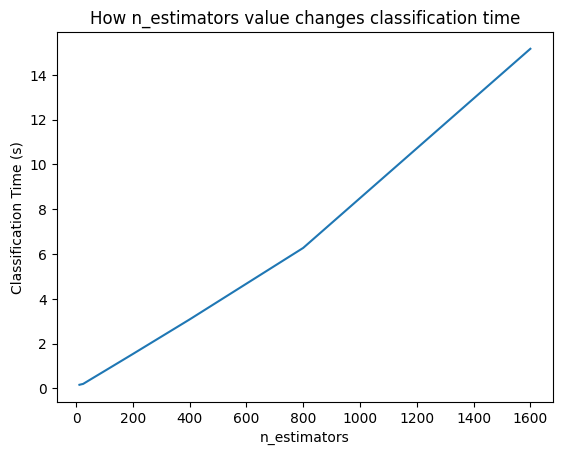

In [42]:
# plot classification time for n_estimators
plt.plot(n_estimators, time_results)
plt.xlabel('n_estimators')
plt.ylabel('Classification Time (s)')
plt.title('How n_estimators value changes classification time')
plt.savefig('n_estimators-time.png')

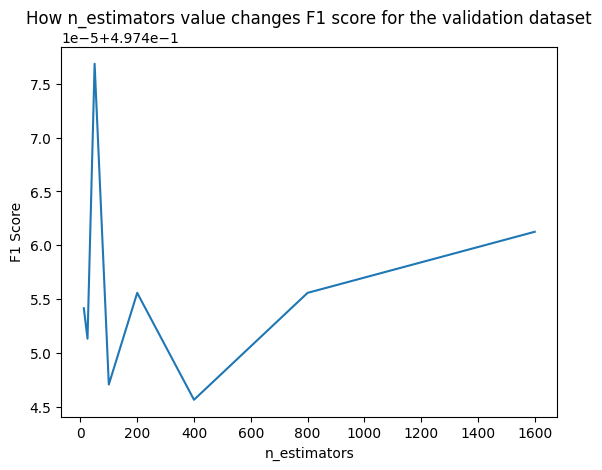

In [43]:
# plot f1 score for n estimators
plt.plot(n_estimators, results)
plt.xlabel('n_estimators')
plt.ylabel('F1 Score')
plt.title('How n_estimators value changes F1 score for the validation dataset')
plt.savefig('n_estimators.png')